## 1. Обучение нейронных сетей （神经网络的训练）

В традиционном программировании результат получается по заданным правилам:  
在传统编程中，程序根据人为设定的规则产生结果：

**правила + данные → ответы**  
**规则 + 数据 → 输出结果**

В машинном обучении всё наоборот:  
而在机器学习中，方向正好相反：

**данные + ответы → правила**  
**数据 + 正确答案 → 自动学习规则**

Вместо ручного написания правил мы предоставляем системе множество размеченных примеров.  
我们不再手写规则，而是提供许多带标签的示例数据。

Она самостоятельно находит статистические закономерности, которые позволяют выполнять нужную задачу.  
模型会自动从数据中寻找统计规律，从而学会完成任务。

При обучении нейронной сети цель состоит в том, чтобы минимизировать функцию потерь —  
то есть ошибку между предсказанным и истинным значением.  
在训练神经网络时，目标是**最小化损失函数**，即预测值与真实值之间的误差。

Для этого используются специальные алгоритмы — оптимизаторы,  
которые постепенно корректируют параметры сети, чтобы улучшить результат.  
为此我们使用**优化算法**（optimizers），它们会不断调整网络参数，使结果越来越好。

Что особенно важно — нейронные сети способны автоматически извлекать параметры из обучающих данных.  
特别重要的一点是：**神经网络能够自动从数据中学习和提取特征与参数**。

Это делает их мощным инструментом для решения широкого круга задач.  
这使得它们成为解决各种复杂任务的强大工具。

В машинном обучении данные обычно делятся на две части:  
在机器学习中，数据通常被分成两部分：

- **Тренировочные данные** используются для обучения модели и настройки параметров.  
  **训练集（训练数据）**用于让模型学习，并用来调整模型参数。

- **Тестовые данные** применяются для оценки обобщающей способности модели.  
  **测试集（测试数据）**用于评估模型的泛化能力。

Чтобы модель хорошо работала не только на обучающих примерах, но и на новых данных, необходимо проверять её обобщающую способность.  
为了使模型不仅在训练样本上表现良好，而且在**新的、未见过的数据**上也能正常工作，必须检验它的泛化能力。

**Цель машинного обучения** — не просто распознать обучающие примеры, а научиться решать задачи на любых новых данных.  
**机器学习的目标**不只是“记住”训练样本，而是学会在各种全新的数据上也能正确地解决任务。

Поэтому важно разделять данные на тренировочные и тестовые, чтобы обеспечить объективную оценку модели.  
因此，必须将数据划分为训练集和测试集，从而对模型进行更加客观、公正的评估。

### 1.1 функция потерь (损失函数)

В обучении нейронных сетей **функция потерь** (loss function) служит мерой того, насколько хорошо или плохо сеть решает задачу: ошибка большая — параметры плохие.  
在神经网络训练中，**损失函数（loss function）** 用来衡量模型效果：误差越大，说明模型的参数越差。

#### 1) Среднеквадратичная ошибка (MSE) — 均方误差
$$
E = \frac{1}{2} \sum_k (y_k - t_k)^2
$$
где $y_k$ — выход сети, а $t_k$ — истинная метка.  
其中 $y_k$ 为网络输出，$t_k$ 为真实标签。

#### 2) Кросс-энтропия (Cross Entropy) — 交叉熵损失
$$
E = - \sum_k t_k \log y_k
$$
Здесь $t_k = 1$ только для правильного класса (one-hot разметка).  
这里 $t_k$ 在正确类别处为 1（one-hot 编码）。

Функция потерь показывает, насколько предсказания сети совпадают с реальными метками.  
损失函数反映模型预测与真实标签的差距。

**Цель обучения — минимизировать это значение и найти наилучшие веса.**  
**训练的目标就是最小化损失，从而找到最佳的网络参数。**

### 1.2 Метод градиентного спуска (梯度下降法)

Метод градиентного спуска — это способ итеративного уменьшения функции, двигаясь в направлении, противоположном её градиенту. Он широко используется в оптимизации нейронных сетей.  
梯度下降法是一种迭代式地沿着函数的反梯度方向移动，从而减小函数值的方法，在神经网络优化中广泛使用。

- В каждой точке вычисляется градиент — направление наибольшего роста функции.  

- 在每个点计算梯度，它表示函数增长最快的方向。

- Чтобы уменьшить значение функции, нужно двигаться *в обратную сторону*, то есть по направлению **градиентного спуска**.  
为了减小函数值，我们沿着梯度的**反方向**移动，这就是梯度下降。

- Эти шаги повторяются до тех пор, пока функция не достигнет минимума или пока алгоритм не остановится.  
  不断重复该步骤，直到函数接近最小值或算法停止。

- Градиент не всегда приводит к глобальному минимуму — возможны **локальные минимумы**.  
  梯度下降不保证找到全局最小值，可能陷入**局部最小值**。

- Существуют точки **седла** (saddle points), где градиент равен нулю,  
  но это не минимум и движение может “застрять”.  
  还存在**鞍点**（梯度为零但不是最小值），算法可能在这里停滞。

### 1.3 Скорость обучения（学习率）

**Скорость обучения** (learning rate, обозначается $\eta$) —  
это гиперпараметр, определяющий, насколько сильно изменяются параметры модели  
на каждом шаге градиентного спуска:  
**学习率**（learning rate，记作 $\eta$）是一个超参数，  
它决定了在每一步梯度下降中，模型参数更新的“步子”有多大：

$$
x_i = x_i - \eta \frac{\partial f}{\partial x_i}
$$

- Если скорость обучения слишком большая — значения «разлетаются», и модель не может сойтись.  
  如果学习率太大，参数更新步伐过大，函数值可能发散，模型无法收敛。

- Если слишком маленькая — обучение идёт очень медленно или останавливается вовсе.  
  如果学习率太小，训练会变得非常缓慢，甚至看起来几乎不再更新。

Типичные значения: $0.01$, $0.001$ и т.д.  典型的学习率取值有：$0.01$、$0.001$ 等。

В обучении нейросетей часто нужно экспериментировать с этим параметром, чтобы достичь хорошей сходимости.  
在训练神经网络时，往往需要对学习率多加尝试和调整，才能获得既收敛又收敛得比较快的效果。

## 2. Реализация обучения нейронной сети

### 2.1 Одномерный градиентный спуск  (一维梯度下降)

Для начала рассмотрим самую простую одномерную функцию:
先从一个最简单的一维函数开始：

$$
L(w) = (w - 3)^2
$$

С её аналитической производной:  
其解析导数为：

$$
\frac{dL}{dw} = 2(w - 3)
$$

- слишком большой шаг обучения → расходимость
学习率过大 → 发散或震荡

- слишком маленький шаг → очень медленная сходимость
学习率过小 → 收敛非常慢


In [19]:
import numpy as np

# Одномерная функция потерь / 一维损失函数
def loss(w):
    # L(w) = (w - 3)^2
    return (w - 3.0) ** 2

def grad_loss(w):
    # dL/dw = 2 (w - 3)
    return 2.0 * (w - 3.0)

def run_gd(eta, steps=20, w0=-4.0):
    w = w0
    print(f"=== learning rate η = {eta} ===")
    for step in range(1, steps + 1):
        g = grad_loss(w)        # градиент / 梯度
        w = w - eta * g         # шаг градиентного спуска / 梯度更新
        print(f"step {step:2d}: w = {w:7.4f}, loss = {loss(w):7.4f}")
    print()

# 尝试不同学习率 / пробуем разные скорости обучения
run_gd(eta=0.1)
run_gd(eta=1.0)
run_gd(eta=0.01)


=== learning rate η = 0.1 ===
step  1: w = -2.6000, loss = 31.3600
step  2: w = -1.4800, loss = 20.0704
step  3: w = -0.5840, loss = 12.8451
step  4: w =  0.1328, loss =  8.2208
step  5: w =  0.7062, loss =  5.2613
step  6: w =  1.1650, loss =  3.3673
step  7: w =  1.5320, loss =  2.1550
step  8: w =  1.8256, loss =  1.3792
step  9: w =  2.0605, loss =  0.8827
step 10: w =  2.2484, loss =  0.5649
step 11: w =  2.3987, loss =  0.3616
step 12: w =  2.5190, loss =  0.2314
step 13: w =  2.6152, loss =  0.1481
step 14: w =  2.6921, loss =  0.0948
step 15: w =  2.7537, loss =  0.0607
step 16: w =  2.8030, loss =  0.0388
step 17: w =  2.8424, loss =  0.0248
step 18: w =  2.8739, loss =  0.0159
step 19: w =  2.8991, loss =  0.0102
step 20: w =  2.9193, loss =  0.0065

=== learning rate η = 1.0 ===
step  1: w = 10.0000, loss = 49.0000
step  2: w = -4.0000, loss = 49.0000
step  3: w = 10.0000, loss = 49.0000
step  4: w = -4.0000, loss = 49.0000
step  5: w = 10.0000, loss = 49.0000
step  6: w = -

### 1.2 Численное дифференцирование vs аналитический градиент (数值微分 vs 解析梯度)

Рассмотрим двумерную функцию (二维函数):

$$
L(\mathbf{w}) = w_1^2 + 3 w_2^2
$$

Её аналитический градиент (解析梯度) равен:

$$
\nabla L(\mathbf{w}) =
\left(
\frac{\partial L}{\partial w_1},
\frac{\partial L}{\partial w_2}
\right)= (2 w_1,\; 6 w_2)
$$

- вычислять градиент по аналитической формуле
用解析公式计算梯度

- вычислять градиент численным методом (центральная разность)
用数值微分（中心差分）近似梯度

- сравнивать оба результата
并比较两者差异

Численный градиент часто применяется для проверки backprop (gradient check)
在实践中，数值梯度常用于 检验反向传播是否正确（gradient check）。

In [21]:
import numpy as np

# Функция потерь от двух параметров / 二维损失函数
def loss_vec(w):
    w1, w2 = w
    return w1**2 + 3.0 * (w2**2)

# Аналитический градиент / 解析梯度
def grad_analytic(w):
    w1, w2 = w
    d_w1 = 2.0 * w1
    d_w2 = 6.0 * w2
    return np.array([d_w1, d_w2])

# Численный градиент (центральная разность) / 数值梯度
def grad_numeric(w, delta=1e-5):
    grad = np.zeros_like(w, dtype=float)
    for i in range(len(w)):
        w_pos = w.copy()
        w_neg = w.copy()
        w_pos[i] += delta
        w_neg[i] -= delta
        grad[i] = (loss_vec(w_pos) - loss_vec(w_neg)) / (2 * delta)
    return grad

w = np.array([1.0, -2.0])

g_a = grad_analytic(w)
g_n = grad_numeric(w)

print("w =", w)
print("analytic grad   =", g_a)
print("numeric  grad   =", g_n)
print("difference      =", np.abs(g_a - g_n))


w = [ 1. -2.]
analytic grad   = [  2. -12.]
numeric  grad   = [  2. -12.]
difference      = [1.31024080e-11 7.86126719e-11]


### 2.3 Mini-batch GD на примере линейной регрессии (在线性回归上演示 mini-batch 梯度下降)

Рассмотрим простую модель линейной регрессии (线性回归模型):

$$
\hat{y} = w x + b
$$

Используем MSE в качестве функции потерь:
我们使用 MSE（均方误差）作为损失函数：

$$
L = \frac{1}{2N} \sum_i (\hat{y}_i - y_i)^2
$$

- генерировать синтетические одномерные данные с шумом；
生成一些带噪声的一维线性数据；

- обучать параметры w,b с помощью mini-batch；
使用 mini-batch 学习参数 w,b；

- наблюдать, как снижается функция потерь；
观察损失函数如何随训练而下降；

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# ---- 1. 生成合成数据 / Генерация данных ----
np.random.seed(0)

true_w = 2.0      # 真值 w
true_b = -1.0     # 真值 b

N = 100
X = np.random.uniform(-2, 2, size=N)    # 100 个均匀分布的点
noise = np.random.normal(scale=0.3, size=N)

y = true_w * X + true_b + noise         # 加噪声的数据

# ---- 2. 初始化参数 / Инициализация параметров ----
w = 0.0
b = 0.0

lr = 0.1          # 学习率
batch_size = 16   # mini-batch 大小
epochs = 50       # 训练轮数

loss_history = []

# ---- 3. 训练循环 / Обучение mini-batch SGD ----
for epoch in range(epochs):
    # 打乱数据顺序 / Перемешиваем данные
    indices = np.random.permutation(N)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    for start in range(0, N, batch_size):
        end = start + batch_size

        xb = X_shuffled[start:end]
        yb = y_shuffled[start:end]

        # ---- 前向计算 / Forward ----
        y_pred = w * xb + b
        loss = 0.5 * np.mean((y_pred - yb)**2)

        # ---- 反向传播（梯度） / Градиенты ----
        dw = np.mean((y_pred - yb) * xb)
        db = np.mean(y_pred - yb)

        # ---- 参数更新 / Обновление параметров ----
        w -= lr * dw
        b -= lr * db

    loss_history.append(loss)

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}: loss = {loss:.4f}")

print("\nLearned parameters:")
print("w ≈", w)
print("b ≈", b)


Epoch 10: loss = 0.0646
Epoch 20: loss = 0.0835
Epoch 30: loss = 0.0963
Epoch 40: loss = 0.1298
Epoch 50: loss = 0.0194

Learned parameters:
w ≈ 1.992997968422649
b ≈ -0.9390856208287375


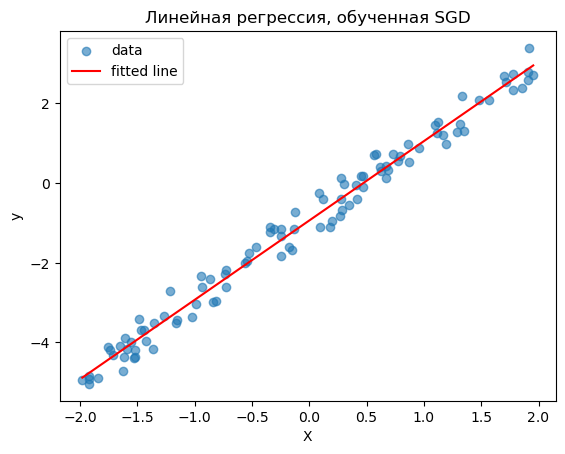

In [31]:
import matplotlib.pyplot as plt

# 绘制数据点与学习后的直线 / График данных и найденной прямой
plt.scatter(X, y, label="data", alpha=0.6)
plt.plot(np.sort(X), w*np.sort(X) + b, color="red", label="fitted line")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Линейная регрессия, обученная SGD")
plt.legend()
plt.show()

### 2.4 Обучение небольшой нейросети 2–3–1 на задаче XOR （用 2–3–1 神经网络在 XOR 上演示完整训练过程）

Рассмотрим простейшую нейросеть со структурой **2–3–1**, решающую классическую задачу XOR.  
用一个结构为 **2–3–1** 的小型神经网络，来解决经典的 XOR 异或问题。

**Структура сети / 网络结构**

- входной слой（输入层）: 2 нейрона — x1, x2  
  输入层有 2 个神经元，对应输入 x1, x2。

- скрытый слой（隐藏层）: 3 нейрона, активация — sigmoid  
  隐藏层有 3 个神经元，使用 sigmoid 激活函数。

- выходной слой（输出层）: 1 нейрон, активация — sigmoid  
  输出层有 1 个神经元，同样使用 sigmoid 激活函数。

**Таблица истинности XOR / XOR 真值表如下：**

|   x1   |   x2  | XOR |
|:------:|:------:|:---:|
|   0    |   0    |  0  |
|   0    |   1    |  1  |
|   1    |   0    |  1  |
|   1    |   1    |  0  |

Эта задача не является линейно разделимой, поэтому требует скрытого слоя.  
这个问题 **不是线性可分的**，因此必须依赖隐藏层来完成分类。

1. **выбор mini-batch**  
   随机选取一个 mini-batch 作为当前迭代使用的数据；

2. **прямой проход (forward)**  
   前向传播，依次计算隐藏层与输出层的值；

3. **вычисление функции потерь (MSE) и градиентов**  
   使用 MSE 作为损失函数，计算损失以及各参数的梯度；

4. **обновление параметров (gradient descent)**  
   根据梯度下降法更新网络的权重和偏置参数；

5. **наблюдение, как уменьшается ошибка по эпохам**  
   观察损失值如何随训练轮数（epoch）逐渐减小，从而判断学习效果。

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# ----- 1. Данные XOR / XOR 数据 -----
X_all = np.array([
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0],
])                      # shape (4,2)

y_all = np.array([[0.0], [1.0], [1.0], [0.0]])  # shape (4,1)

# ----- 2. Активация / 激活函数 -----
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_deriv(a):
    # a = sigmoid(x)
    return a * (1.0 - a)

# ----- 3. Инициализация параметров / 初始化参数 -----
rng = np.random.default_rng(0)

input_dim  = 2
hidden_dim = 3
output_dim = 1

W1 = rng.normal(scale=1.0, size=(input_dim, hidden_dim))
b1 = np.zeros((1, hidden_dim))

W2 = rng.normal(scale=1.0, size=(hidden_dim, output_dim))
b2 = np.zeros((1, output_dim))

# ----- 4. Гиперпараметры / 超参数 -----
lr         = 0.1
epochs     = 20000
batch_size = 2

n_samples = X_all.shape[0]
loss_history = []

# ----- 5. Цикл обучения / 训练循环 -----
for epoch in range(epochs):
    indices = rng.permutation(n_samples)
    X_sh = X_all[indices]
    y_sh = y_all[indices]

    for start in range(0, n_samples, batch_size):
        end = start + batch_size
        X = X_sh[start:end]   # (B,2)
        y = y_sh[start:end]   # (B,1)
        B = X.shape[0]

        # === 1) Forward / 前向 ===
        A1 = X @ W1 + b1          # (B,3)
        Z1 = sigmoid(A1)

        A2 = Z1 @ W2 + b2         # (B,1)
        y_hat = sigmoid(A2)

        # === 2) Loss (MSE) / 损失 ===
        loss = 0.5 * np.mean((y_hat - y) ** 2)

        # === 3) Backward / 反向传播 ===
        dA2 = (y_hat - y) * sigmoid_deriv(y_hat)   # (B,1)
        dA2 /= B

        dW2 = Z1.T @ dA2                        # (3,1)
        db2 = np.sum(dA2, axis=0, keepdims=True)

        dZ1 = dA2 @ W2.T                        # (B,3)
        dA1 = dZ1 * sigmoid_deriv(Z1)
        dW1 = X.T @ dA1                         # (2,3)
        db1 = np.sum(dA1, axis=0, keepdims=True)

        # === 4) Update / 更新 ===
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

    loss_history.append(loss)

    if (epoch + 1) % 1000 == 0:
        print(f"epoch {epoch+1}, loss={loss:.4f}")


epoch 1000, loss=0.1298
epoch 2000, loss=0.1234
epoch 3000, loss=0.1249
epoch 4000, loss=0.1281
epoch 5000, loss=0.1277
epoch 6000, loss=0.1283
epoch 7000, loss=0.1252
epoch 8000, loss=0.0888
epoch 9000, loss=0.0738
epoch 10000, loss=0.0267
epoch 11000, loss=0.0089
epoch 12000, loss=0.0080
epoch 13000, loss=0.0074
epoch 14000, loss=0.0041
epoch 15000, loss=0.0033
epoch 16000, loss=0.0017
epoch 17000, loss=0.0031
epoch 18000, loss=0.0027
epoch 19000, loss=0.0011
epoch 20000, loss=0.0016



Проверка обученной сети:
x=[0. 0.], y_pred≈0.030, target=0
x=[0. 1.], y_pred≈0.943, target=1
x=[1. 0.], y_pred≈0.945, target=1
x=[1. 1.], y_pred≈0.071, target=0


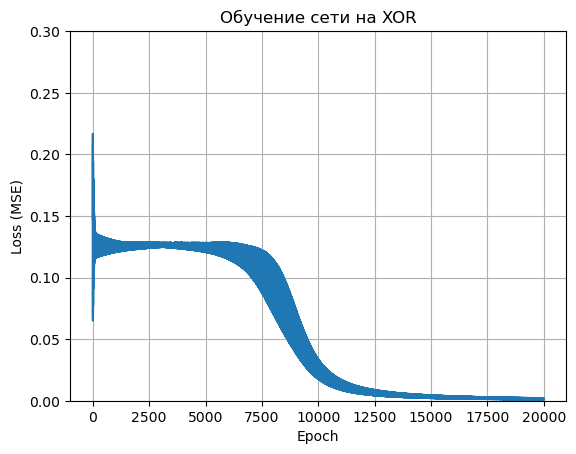

In [33]:
# ----- 6. Проверка на всех точках XOR / 检查结果 -----
print("\nПроверка обученной сети:")
for x, t in zip(X_all, y_all):
    x = x.reshape(1, -1)
    A1 = x @ W1 + b1
    Z1 = sigmoid(A1)
    A2 = Z1 @ W2 + b2
    y_pred = sigmoid(A2)
    print(f"x={x[0]}, y_pred≈{y_pred[0,0]:.3f}, target={int(t[0])}")

# ----- 7. График функции потерь / 绘制损失曲线 -----
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.ylim(0, 0.3)
plt.title("Обучение сети на XOR")
plt.grid(True)
plt.show()
